# The Movie Database API Exploration

# Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 500):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,6145.158,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1708
1,2,False,785985,fr,1448.561,/h5hVeCfYSb8gIO0F41gqidtb0AI.jpg,The Takedown,5.9,225
2,3,False,892527,fr,953.583,/kEyi52oFS45X5sb78kAMnfrenxm.jpg,King,7.2,29
3,4,False,524434,en,727.434,/bcCBq9N1EMo3daNIjWJ8kYvrQm6.jpg,Eternals,7.1,5719
4,5,False,1865,en,526.315,/keGfSvCmYj7CvdRx36OdVrAEibE.jpg,Pirates of the Caribbean: On Stranger Tides,6.5,12024


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,6145.158,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1708
1,785985,fr,1448.561,/h5hVeCfYSb8gIO0F41gqidtb0AI.jpg,The Takedown,5.9,225
2,892527,fr,953.583,/kEyi52oFS45X5sb78kAMnfrenxm.jpg,King,7.2,29
3,524434,en,727.434,/bcCBq9N1EMo3daNIjWJ8kYvrQm6.jpg,Eternals,7.1,5719
4,1865,en,526.315,/keGfSvCmYj7CvdRx36OdVrAEibE.jpg,Pirates of the Caribbean: On Stranger Tides,6.5,12024
...,...,...,...,...,...,...,...
494,984868,en,10.174,/xW28a8NKSWFTjeV3wpfP5StxWzC.jpg,Oro Arrowhead,5.0,3
495,44587,ja,10.159,/fQNLUoo9Fd0jvsjIsCd9C6dMqGK.jpg,X: The Movie,5.7,40
496,10218,en,10.142,/rRjWk68kU3a2so4lgr3TKB7Y5vA.jpg,Swingers,6.9,571
497,18767,cn,10.125,/l9MPPqbWGkIMJnp177Wk4AxGtx8.jpg,Island of Fire,6.1,87


In [8]:
df.shape

(499, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 499 non-null    int64  
 1   original_language  499 non-null    object 
 2   popularity         499 non-null    float64
 3   poster_path        496 non-null    object 
 4   title              499 non-null    object 
 5   vote_average       499 non-null    float64
 6   vote_count         499 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.4+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 499 entries, 0 to 498
Series name: id
Non-Null Count  Dtype   
--------------  -----   
499 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,499,499,496,499
unique,499,25,496,496
top,15,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Aftermath
freq,1,371,1,2


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,499.000000,499.000000,499.000000
mean,54.684806,6.311824,1366.386774
std,289.922239,1.454905,2759.617385
min,10.112000,0.000000,0.000000
25%,13.018000,5.900000,95.000000
50%,18.749000,6.600000,392.000000
75%,35.554500,7.200000,1258.500000
max,6145.158000,8.900000,21652.000000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

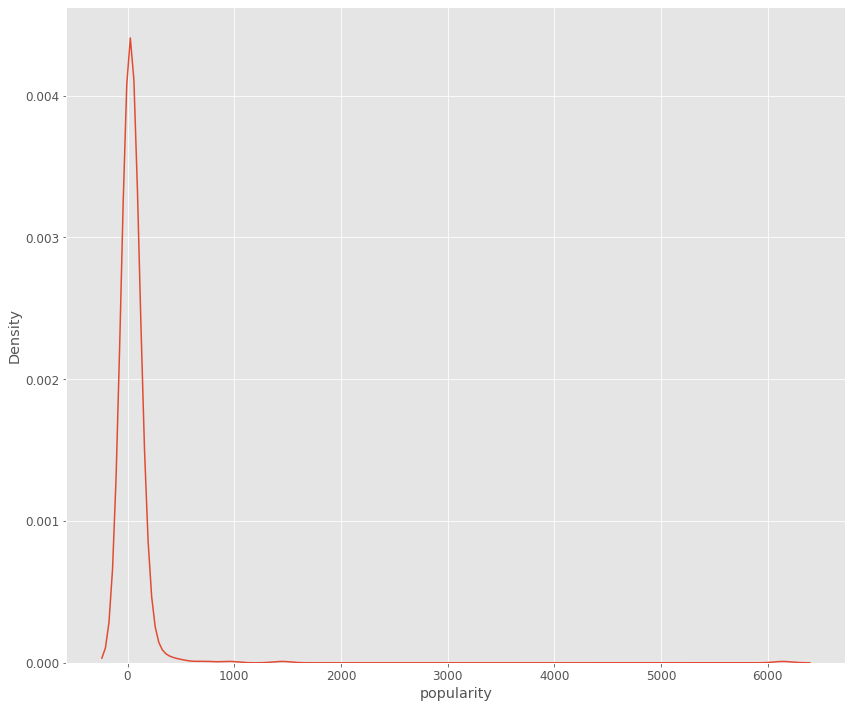

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

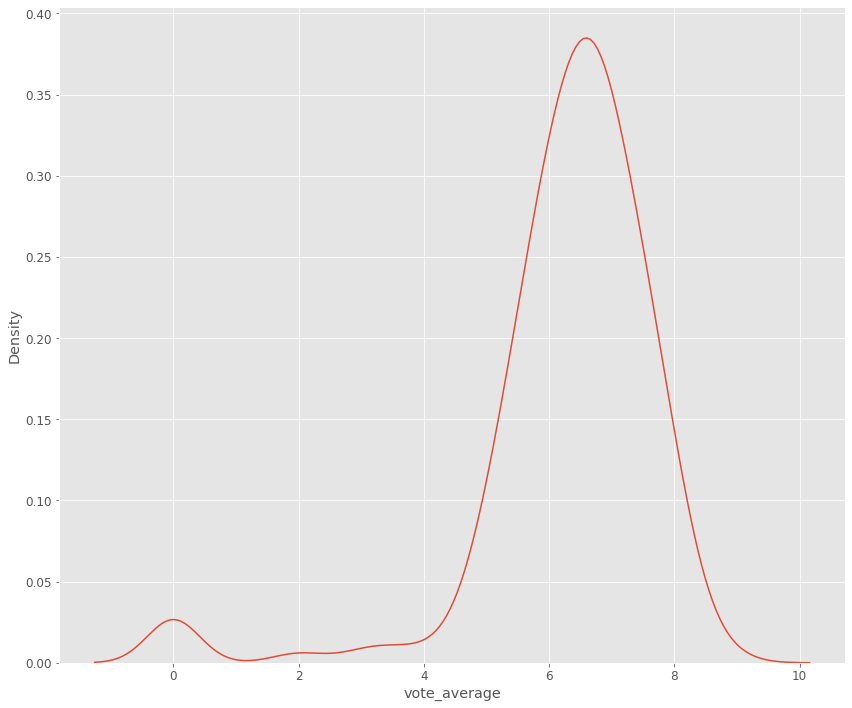

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

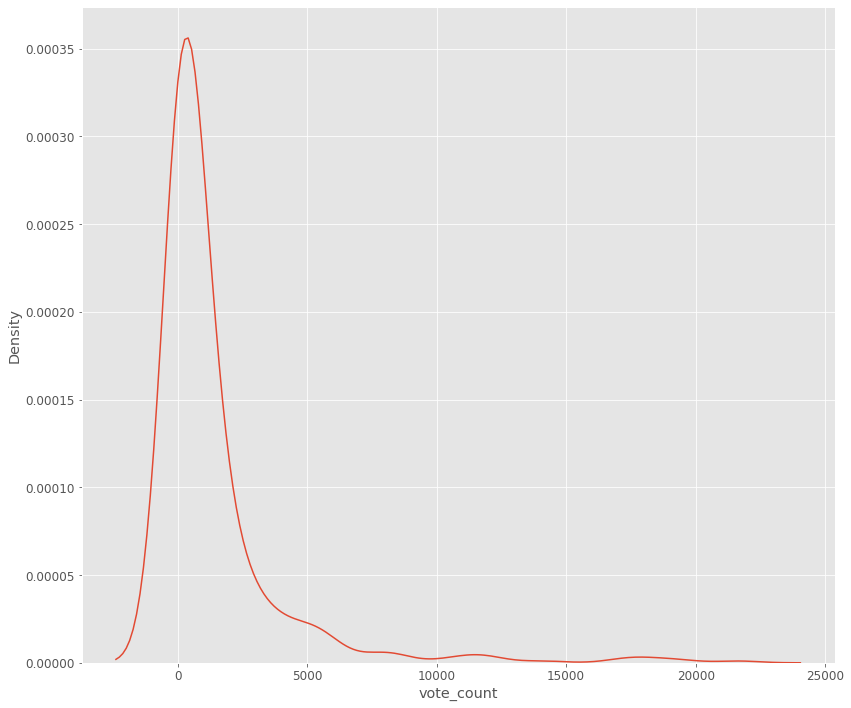

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          3
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

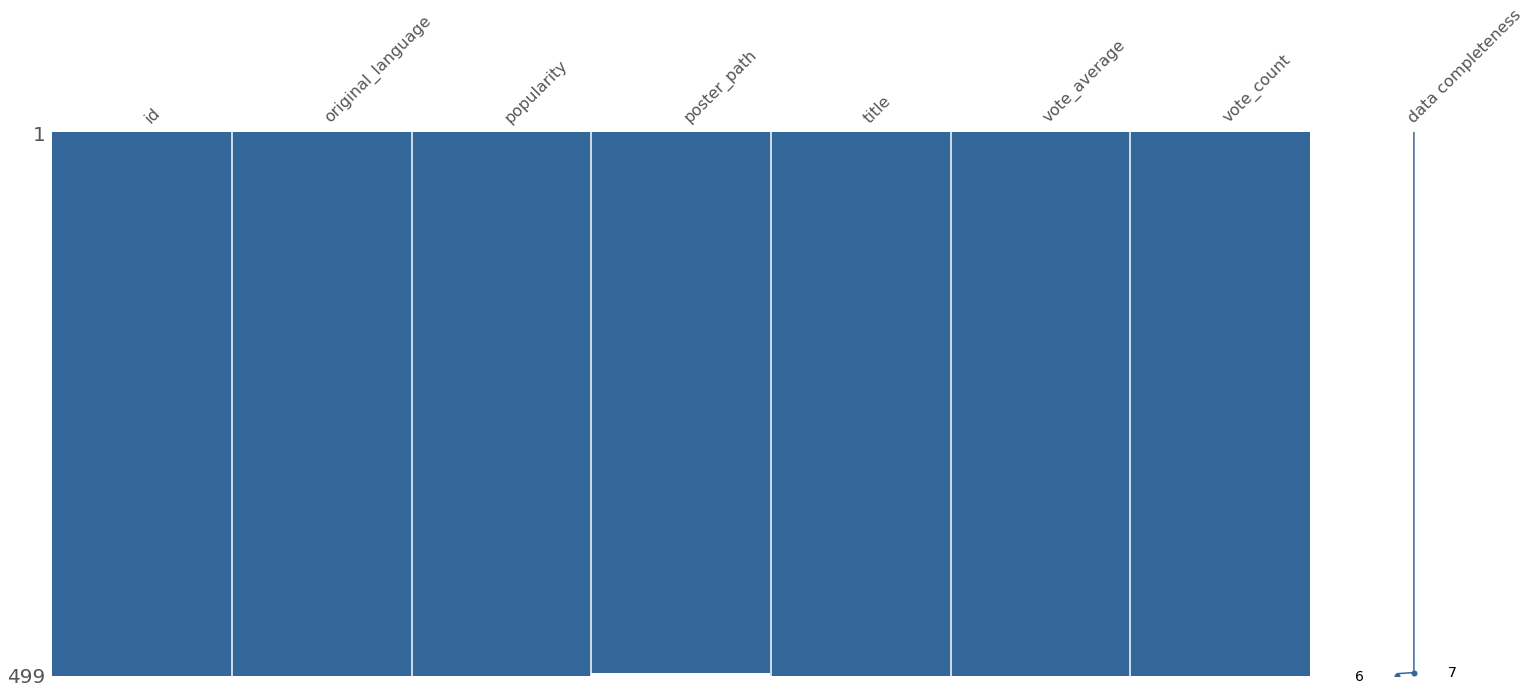

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

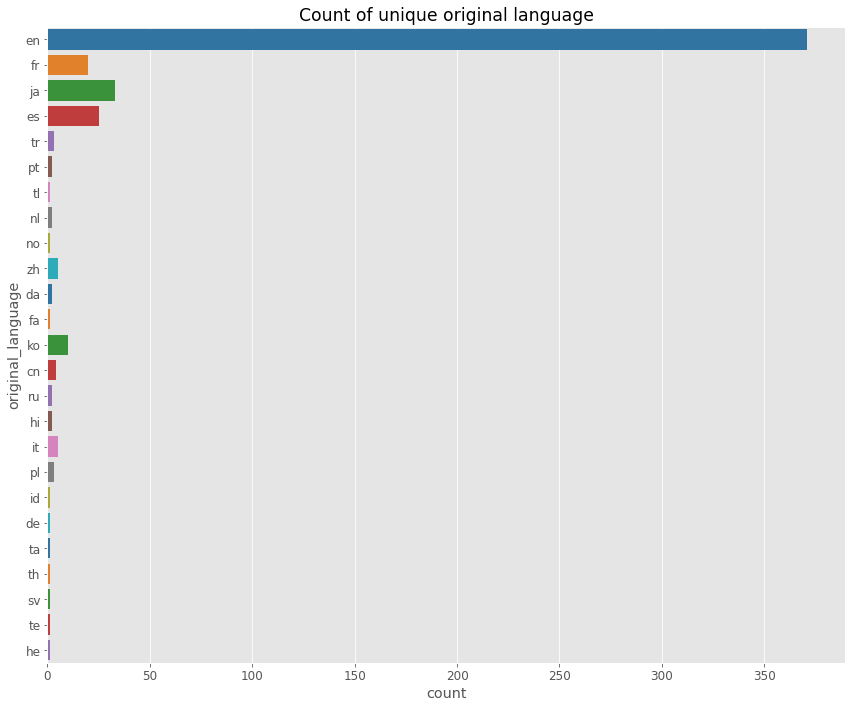

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

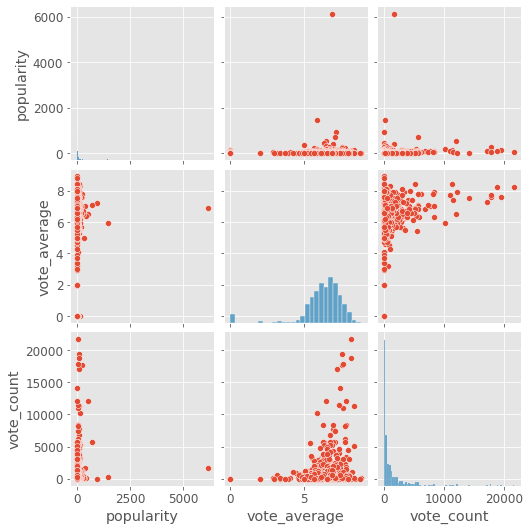

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.029197,0.061619
vote_average,0.029197,1.000000,0.224568
vote_count,0.061619,0.224568,1.000000


<AxesSubplot:>

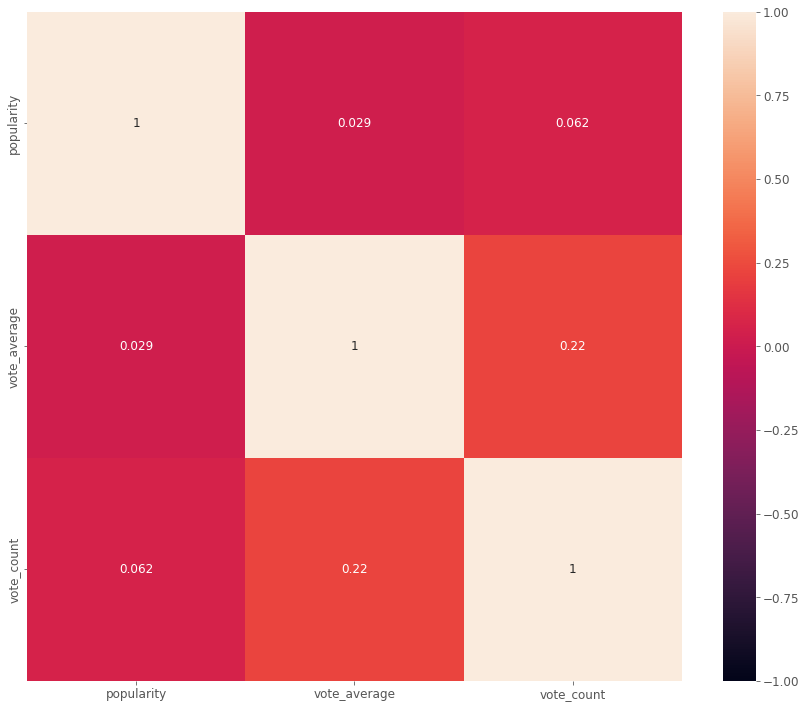

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

# Movies With Release Date

In [26]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
# release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies[:52]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  # rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [27]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  # 'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,6145.158,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1708
1,2,False,785985,fr,1448.561,/h5hVeCfYSb8gIO0F41gqidtb0AI.jpg,The Takedown,5.9,225
2,3,False,892527,fr,953.583,/kEyi52oFS45X5sb78kAMnfrenxm.jpg,King,7.2,29
3,4,False,524434,en,727.434,/bcCBq9N1EMo3daNIjWJ8kYvrQm6.jpg,Eternals,7.1,5719
4,5,False,1865,en,526.315,/keGfSvCmYj7CvdRx36OdVrAEibE.jpg,Pirates of the Caribbean: On Stranger Tides,6.5,12024


In [28]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,6145.158,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1708
1,785985,fr,1448.561,/h5hVeCfYSb8gIO0F41gqidtb0AI.jpg,The Takedown,5.9,225
2,892527,fr,953.583,/kEyi52oFS45X5sb78kAMnfrenxm.jpg,King,7.2,29
3,524434,en,727.434,/bcCBq9N1EMo3daNIjWJ8kYvrQm6.jpg,Eternals,7.1,5719
4,1865,en,526.315,/keGfSvCmYj7CvdRx36OdVrAEibE.jpg,Pirates of the Caribbean: On Stranger Tides,6.5,12024


In [29]:
df1.shape

(52, 7)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52 non-null     int64  
 1   original_language  52 non-null     object 
 2   popularity         52 non-null     float64
 3   poster_path        52 non-null     object 
 4   title              52 non-null     object 
 5   vote_average       52 non-null     float64
 6   vote_count         52 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ KB


In [31]:
pd.value_counts(df1.dtypes)

object     3
int64      2
float64    2
dtype: int64

In [32]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52 entries, 0 to 51
Series name: id
Non-Null Count  Dtype   
--------------  -----   
52 non-null     category
dtypes: category(1)
memory usage: 2.6 KB


In [33]:
# df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
# df1.dtypes

In [34]:
# df1['year'] = df1['release_date'].dt.year                       # extract year
# df1['month'] = df1['release_date'].dt.month                     # extract month
# df1['day'] = df1['release_date'].dt.day                         # extract day
# df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
# df1['week'] = df1['release_date'].dt.week                       # extract week
# df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

# df1.head()

In [35]:
df1.describe(exclude='number')

,id,original_language,poster_path,title
count,52,52,52,52
unique,52,5,52,52
top,162,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore
freq,1,45,1,1


In [36]:
# df1.drop(columns=['year', 'month', 'day',	'week', 'quarter']).describe(include='number')

<AxesSubplot:xlabel='popularity', ylabel='Density'>

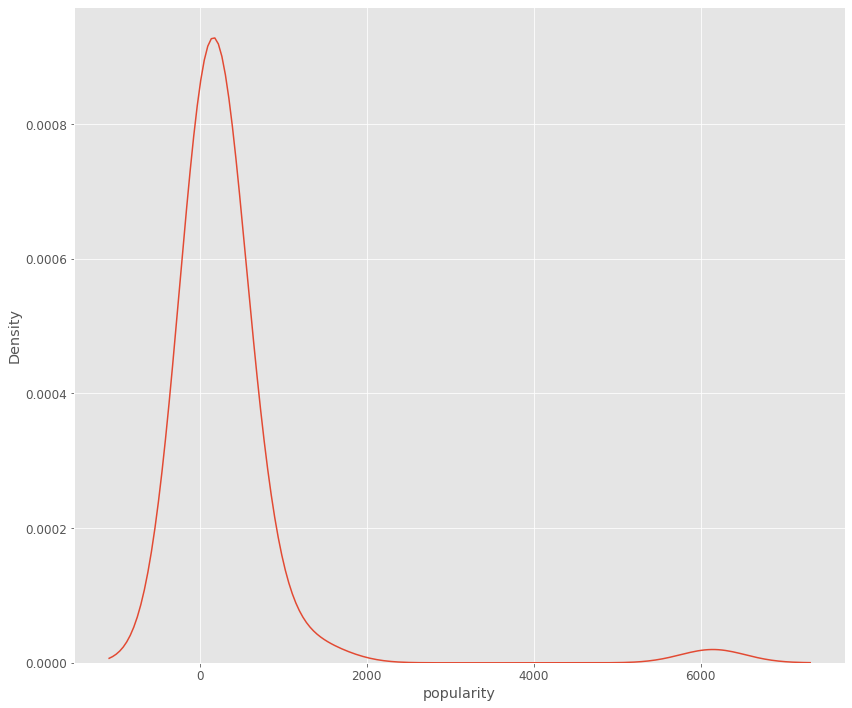

In [37]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

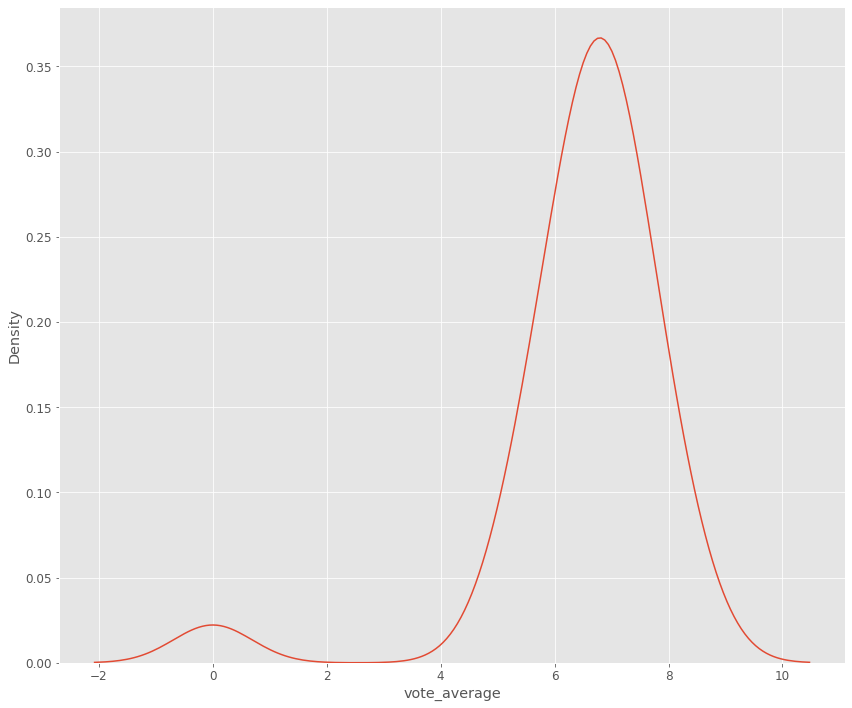

In [38]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

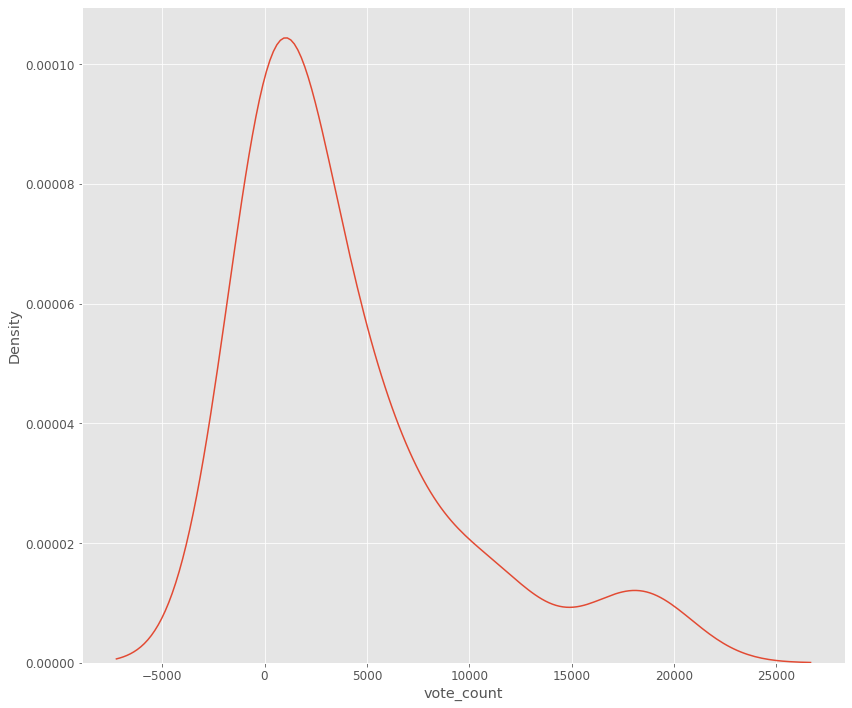

In [39]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [40]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

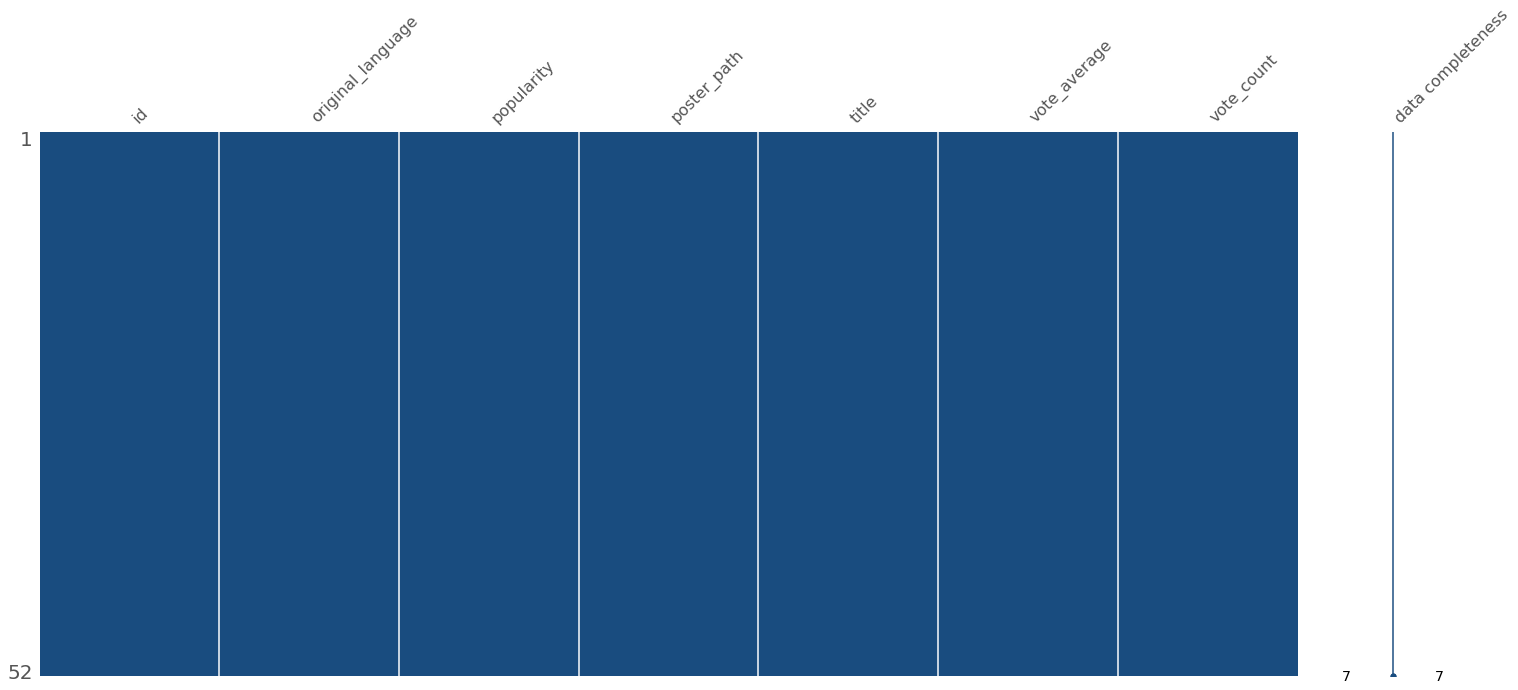

In [41]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))